<a href="https://colab.research.google.com/github/janosova5/disaster-prediction-NLP/blob/Denisa/Notebook_cleaning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sn
import setuptools.dist

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import keras

In [ ]:
import plotly.graph_objects as go
import seaborn as sns
from collections import Counter
import plotly.express as px
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


##Loading data

In [ ]:
!git clone https://github.com/janosova5/disaster-prediction-NLP.git

%cd /content/disaster-prediction-NLP/disaster-prediction-NLP

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")

Cloning into 'disaster-prediction-NLP'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 61 (delta 30), reused 39 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 2.04 MiB | 6.82 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/disaster-prediction-NLP/disaster-prediction-NLP


In [ ]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train_data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
test_data.isnull().sum()

,0
id,0
keyword,26
location,1105
text,0


In [ ]:
#počet znakov v texte
train_data['text_length'] = train_data['text'].apply(len)

print(train_data['text_length'].head())

print(train_data['target'].value_counts())

0     69
1     38
2    133
3     65
4     88
Name: text_length, dtype: int64
target
0    4342
1    3271
Name: count, dtype: int64


In [ ]:
train_data.head(5)

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


##EDA

In [ ]:
train_data['target'].value_counts()

,count
target,
0,4342
1,3271


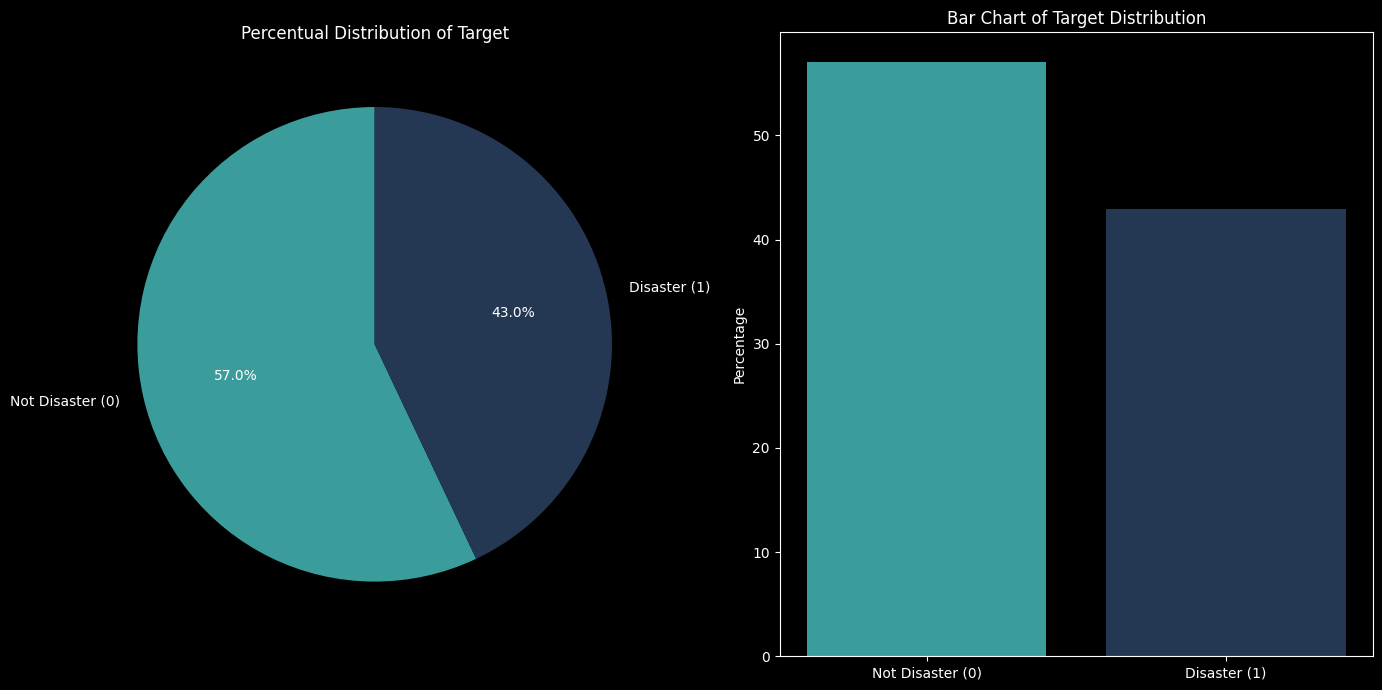

In [ ]:
plt.style.use('dark_background')
target_counts = train_data['target'].value_counts()

percentages = target_counts / target_counts.sum() * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 7))


colors = ['#3B9C9C', '#253853']

axes[0].pie(percentages, labels=['Not Disaster (0)', 'Disaster (1)'], autopct='%1.1f%%', colors=colors, startangle=90, textprops={'color':'white'})
axes[0].set_title('Percentual Distribution of Target', color='white')

axes[1].bar(['Not Disaster (0)', 'Disaster (1)'], percentages, color=colors)
axes[1].set_title('Bar Chart of Target Distribution', color='white')
axes[1].set_ylabel('Percentage', color='white')

for ax in axes:
    ax.tick_params(colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')


plt.tight_layout()
plt.show()

In [ ]:
print(train_data[['text_length', 'target']].describe())

fig = px.histogram(
    train_data,
    x='text_length',
    color='target',
    color_discrete_sequence= ('#CFECEC','#3B9C9C'),
    labels={'text_length': 'Text Length', 'target': 'Target'},
    title='Distribution of Text Length by Category',
    barmode='group'
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    xaxis_title_font_color='white',
    yaxis_title_font_color='white',
    legend_title_font_color='white',
    legend_font_color='white',
    xaxis=dict(
        title_text='Text Length',
        tickfont=dict(color='white'),
        gridcolor='gray'
    ),
    yaxis=dict(
        title_text='Count',
        tickfont=dict(color='white'),
        gridcolor='gray'
    )
)

fig.show()



       text_length      target
count  7613.000000  7613.00000
mean    101.037436     0.42966
std      33.781325     0.49506
min       7.000000     0.00000
25%      78.000000     0.00000
50%     107.000000     0.00000
75%     133.000000     1.00000
max     157.000000     1.00000


In [ ]:

def count_sentences(text):
    sentences = re.split(r'[.!?]+', text)
    return len([s for s in sentences if s.strip() != ''])

train_data['sentence_count'] = train_data['text'].apply(count_sentences)

train_data = train_data[train_data['sentence_count'] <= 10]

fig = px.histogram(
    train_data,
    x='sentence_count',
    color='target',
    color_discrete_sequence=['#253853', '#3B9C9C'],
    labels={'sentence_count': 'Sentence Count', 'target': 'Target'},
    title='Distribution of Sentence Count by Category',
    barmode='group'
)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    xaxis_title_font_color='white',
    yaxis_title_font_color='white',
    legend_title_font_color='white',
    legend_font_color='white',
    xaxis=dict(
        title_text='Sentence Count',
        tickfont=dict(color='white'),
        gridcolor='gray'
    ),
    yaxis=dict(
        title_text='Count',
        tickfont=dict(color='white'),
        gridcolor='gray'
    ),
    bargap=0.2
)

fig.update_traces(
    marker=dict(
        opacity=0.8
    )
)

fig.show()



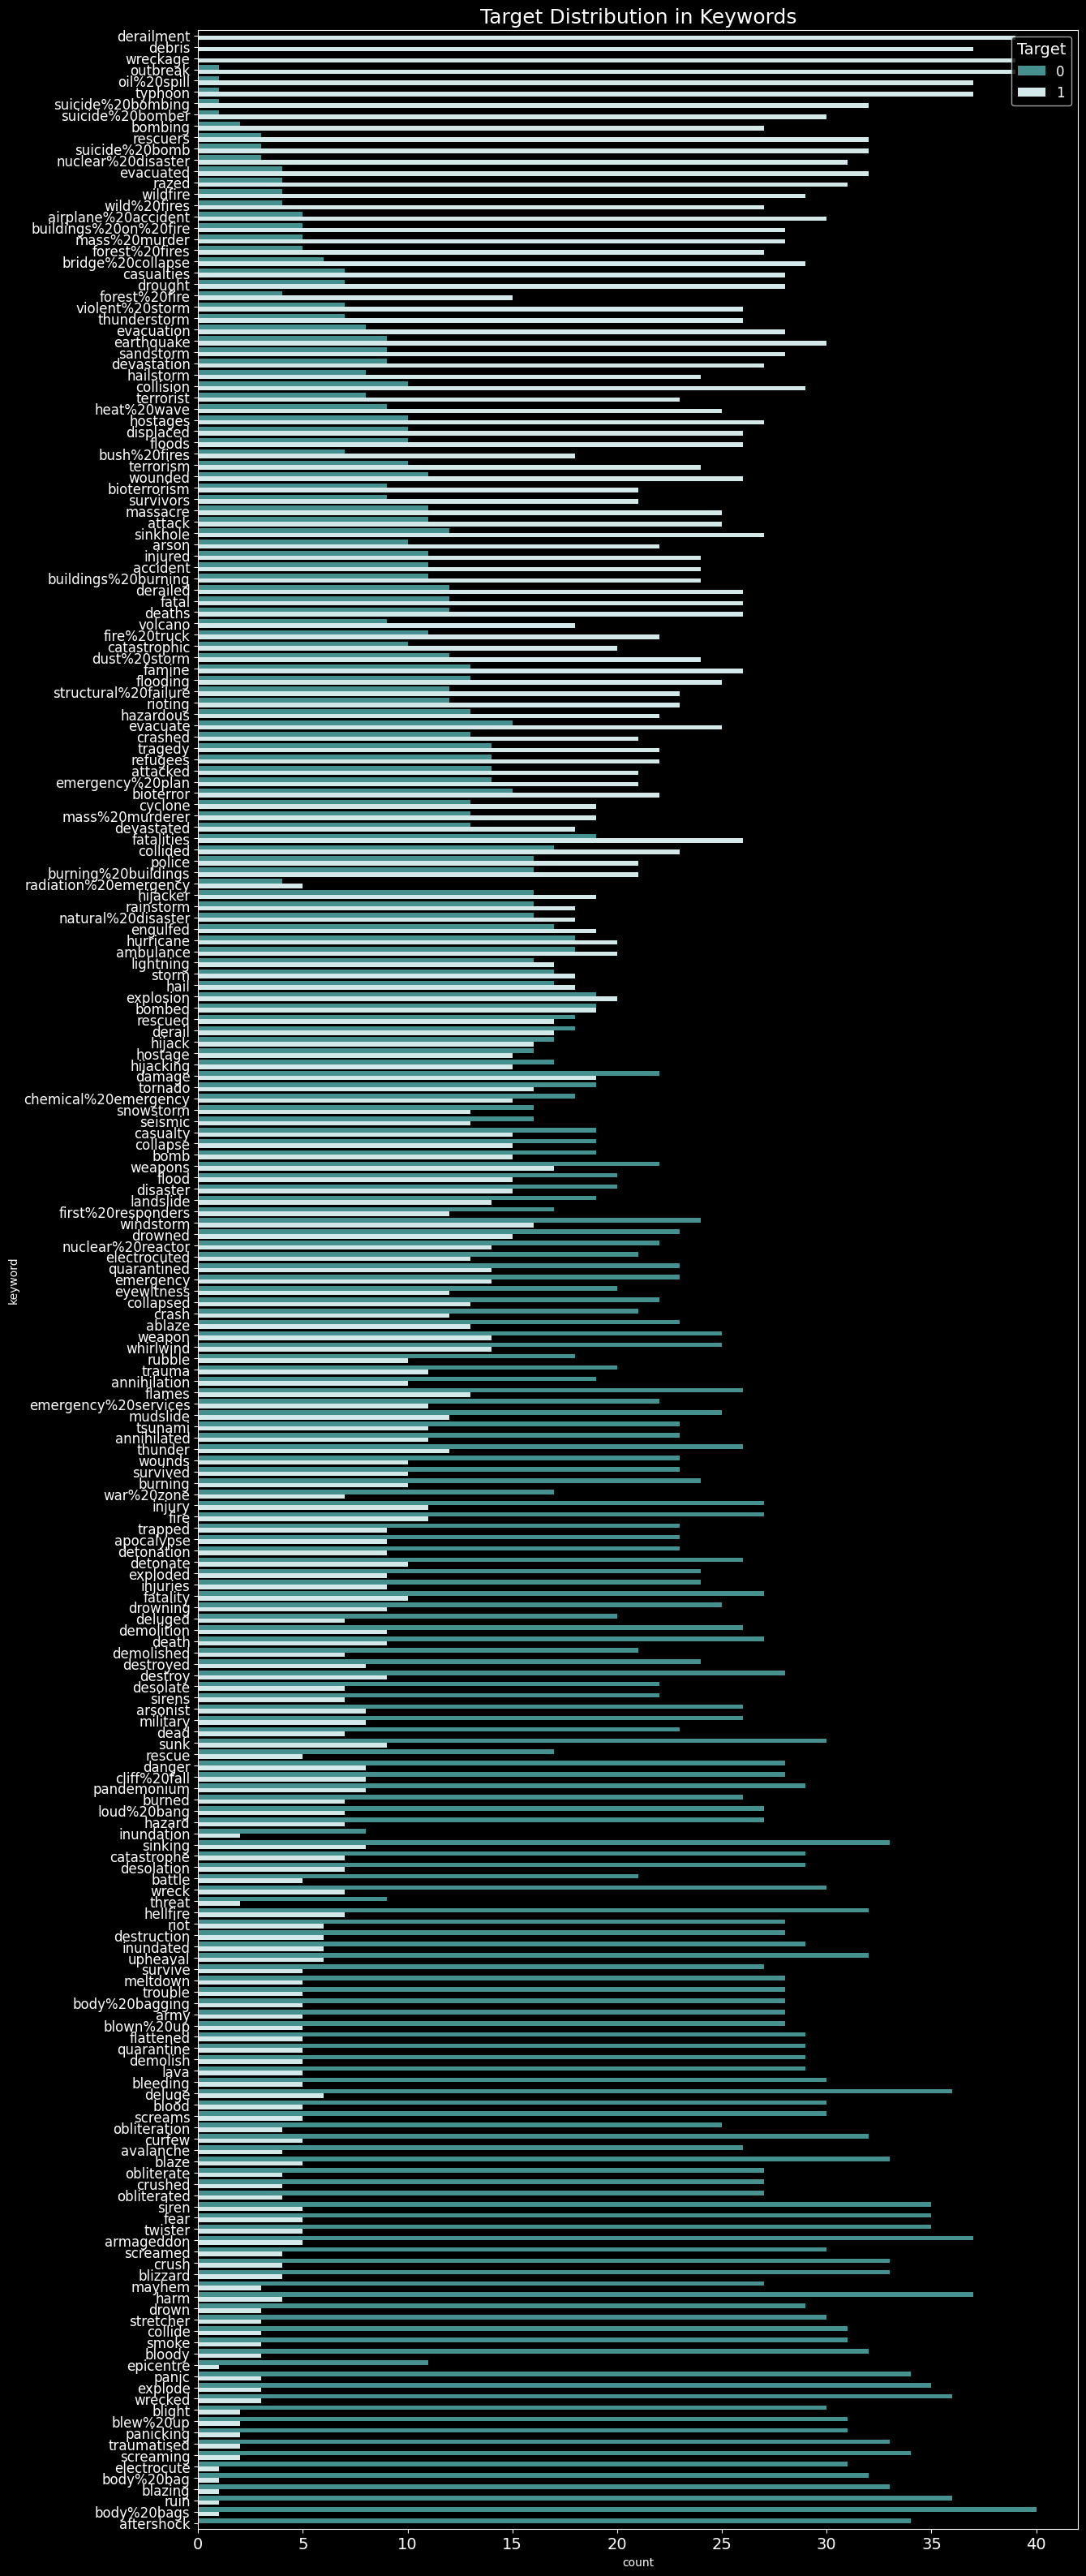

In [ ]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig, ax = plt.subplots(figsize=(14, 40), dpi=100)

sorted_keywords = train_data.sort_values(by='target_mean', ascending=False)['keyword']

sns.countplot(y=sorted_keywords,
              hue=train_data.sort_values(by='target_mean', ascending=False)['target'],
              ax=ax,
              palette={0: '#3B9C9C', 1: '#CFECEC'})

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc='upper right', title='Target', title_fontsize='14', fontsize='12')
ax.set_title('Target Distribution in Keywords', fontsize=18)

plt.show()

train_data.drop(columns=['target_mean'], inplace=True)

In [ ]:
target_0_keywords = train_data[train_data['target'] == 0]['keyword']
target_1_keywords = train_data[train_data['target'] == 1]['keyword']

top_10_target_0 = Counter(target_0_keywords).most_common(10)
top_10_target_1 = Counter(target_1_keywords).most_common(10)

df_target_0 = pd.DataFrame(top_10_target_0, columns=['keyword', 'count'])
df_target_0['target'] = '0'

df_target_1 = pd.DataFrame(top_10_target_1, columns=['keyword', 'count'])
df_target_1['target'] = '1'

top_keywords = pd.concat([df_target_0, df_target_1])

fig = px.bar(top_keywords, x='keyword', y='count', color='target',
             barmode='group',
             title='Top 10 keywords according to Target',
             color_discrete_sequence=['#253853', '#3B9C9C'])

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    title_font_color='white',
    xaxis_title_font_color='white',
    yaxis_title_font_color='white',
    legend_title_font_color='white',
    legend_font_color='white',
    xaxis=dict(
        title_text='Keyword',
        tickfont=dict(color='white')
    ),
    yaxis=dict(
        title_text='Count',
        tickfont=dict(color='white')
    )
)

fig.show()

In [ ]:
# Zistenie duplicitných tweetov
duplicate_tweets = train_data[train_data.duplicated(subset='text', keep=False)]

# Zistenie počtu duplicitných tweetov
num_duplicates = duplicate_tweets.shape[0]

# Zobrazenie niektorých duplicitných tweetov
print(f'Number of duplicate tweets: {num_duplicates}')
print(duplicate_tweets[['text']].drop_duplicates().head())


Number of duplicate tweets: 179
                                                  text
40   Check these out: http://t.co/rOI2NSmEJJ http:/...
106  320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...
118  320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...
147  Experts in France begin examining airplane deb...
610                         To fight bioterrorism sir.


In [ ]:
duplicate_tweets.head(30)

,id,keyword,location,text,target,text_length,sentence_count
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,5
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,114,5
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0,138,3
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0,138,3
118,171,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0,138,3
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0,138,3
147,211,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1,136,1
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1,136,1
610,881,bioterrorism,NaN,To fight bioterrorism sir.,1,26,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0,26,1


In [ ]:
#zlučiť train a test ...vyčisťiť... a potom ich rozdeliť

#zrušiť duplicity
#nahradiť NaN hodnoty za 0
#normalizácia textu, keywords,
#rozdelenie hastagov do iného stlpca a potom odstranenie hastagu
#rozdelenie učtov do iného stlpca a potom odstranenie hastagu
#odstrániť location
#pripradiť k textu kľúčové slová

##Data preprocesing

###Cleaning

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Pridanie stĺpca 'target' do test.csv s hodnotou 3
test_df['target'] = 3

#Spojenie train.csv a upraveného test.csv
combined_df = pd.concat([train_df, test_df], ignore_index=True)

combined_df.to_csv('combined_data.csv', index=False)

train_recovered_df = combined_df[combined_df['target'] != 3]
test_recovered_df = combined_df[combined_df['target'] == 3]

train_recovered_df.to_csv('recovered_train.csv', index=False)
test_recovered_df.to_csv('recovered_test.csv', index=False)

In [ ]:
combined_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
import pandas as pd
import re

combined_df = pd.read_csv('combined_data.csv')

# Funkcia na extrakciu účtov a aktualizáciu textu
def extract_user_mentions(text):
    user_mentions = re.findall(r'@\w+', text)
    cleaned_text = re.sub(r'@\w+', '', text).strip()
    return pd.Series([', '.join(user_mentions), cleaned_text])

# Funkcia na extrakciu hashtagov a aktualizáciu textu
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    cleaned_text = re.sub(r'#\w+', '', text).strip()
    return pd.Series([', '.join(hashtags), cleaned_text])

# Krok 1: Nahraď NaN hodnoty v stĺpci 'keyword' hodnotou 'unknown' ak existuje
if 'keyword' in combined_df.columns:
    combined_df['keyword'] = combined_df['keyword'].fillna('unknown')

# Krok 2: Presuň hodnotu zo stĺpca 'keyword' pred text v stĺpci 'text'
if 'keyword' in combined_df.columns:
    combined_df['text'] = combined_df.apply(lambda row: f"{row['keyword']} {row['text']}", axis=1)

# Krok 3: Odstráň stĺpec 'keyword' ak existuje
if 'keyword' in combined_df.columns:
    combined_df = combined_df.drop(columns=['keyword'])

# Krok 4: Odstráň stĺpec 'location' ak existuje
if 'location' in combined_df.columns:
    combined_df = combined_df.drop(columns=['location'])

# Krok 5: Extrakcia účtov a aktualizácia textu
combined_df[['user', 'text']] = combined_df['text'].apply(extract_user_mentions)

# Krok 6: Extrakcia hashtagov a aktualizácia textu
combined_df[['hashtags', 'text']] = combined_df['text'].apply(extract_hashtags)

# Krok 7: Odstráň stĺpec 'user'
if 'user' in combined_df.columns:
    combined_df = combined_df.drop(columns=['user'])

# Krok 8: Presuň hodnotu zo stĺpca 'hashtags' pred text (za 'keyword')
def prepend_hashtags(row):
    hashtags = row['hashtags'].replace('#', '').strip()  # Odstráni znak '#'
    text = row['text']
    if hashtags:
        return f"{hashtags} {text}"
    else:
        return text

# Pridáme stĺpec 'hashtags' pre funkciu prepend_hashtags
combined_df['text'] = combined_df.apply(prepend_hashtags, axis=1)

# Odstráň stĺpec 'hashtags'
if 'hashtags' in combined_df.columns:
    combined_df = combined_df.drop(columns=['hashtags'])

# Uloženie upraveného súboru
combined_df.to_csv('modified_combined_data.csv', index=False)


In [ ]:
combined_df.head(50)

,id,text,target
0,1,earthquake unknown Our Deeds are the Reason of...,1
1,4,unknown Forest fire near La Ronge Sask. Canada,1
2,5,unknown All residents asked to 'shelter in pla...,1
3,6,"wildfires unknown 13,000 people receive evacu...",1
4,7,"Alaska, wildfires unknown Just got sent this p...",1
5,8,"RockyFire, CAfire, wildfires unknown Update =...",1
6,10,"flood, disaster unknown Heavy rain causes fl...",1
7,13,unknown I'm on top of the hill and I can see a...,1
8,14,unknown There's an emergency evacuation happen...,1
9,15,unknown I'm afraid that the tornado is coming ...,1


In [ ]:
df_com = pd.read_csv("modified_combined_data.csv")

In [ ]:
df_com.head()

,id,text,target
0,1,earthquake unknown Our Deeds are the Reason of...,1
1,4,unknown Forest fire near La Ronge Sask. Canada,1
2,5,unknown All residents asked to 'shelter in pla...,1
3,6,"wildfires unknown 13,000 people receive evacu...",1
4,7,"Alaska, wildfires unknown Just got sent this p...",1


In [ ]:
def normalize_text(text):
    if pd.isna(text):
        return text

    # Odstráni URL adresy
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Odstráni špeciálne znaky a nežiaduce znaky
    text = re.sub(r'[^\w\s]', '', text)  # Odstráni všetky znaky okrem alfanumerických a medzier
    text = re.sub(r'\s+', ' ', text).strip()  # Nahradí viacnásobné medzery jednou medzerou

    # Ďalšie úpravy na odstránenie špecifických znakov, ak je to potrebné
    text = re.sub(r'Â‰|Ă›|Ă', '', text)  # Príklad: odstráni špecifické znaky

    return text

df_com['text'] = df_com['text'].apply(normalize_text)

df_com.to_csv('normalized_df_com.csv', index=False)

In [ ]:
df_com.head(50)

,id,text,target
0,1,earthquake unknown Our Deeds are the Reason of...,1
1,4,unknown Forest fire near La Ronge Sask Canada,1
2,5,unknown All residents asked to shelter in plac...,1
3,6,wildfires unknown 13000 people receive evacuat...,1
4,7,Alaska wildfires unknown Just got sent this ph...,1
5,8,RockyFire CAfire wildfires unknown Update Cali...,1
6,10,flood disaster unknown Heavy rain causes flash...,1
7,13,unknown Im on top of the hill and I can see a ...,1
8,14,unknown Theres an emergency evacuation happeni...,1
9,15,unknown Im afraid that the tornado is coming t...,1


###Tokens

In [ ]:
df_com['tokens'] = df_com['text'].apply(word_tokenize)

In [ ]:
df_com.head(10)

,id,text,target,tokens
0,1,earthquake unknown Our Deeds are the Reason of...,1,"[earthquake, unknown, Our, Deeds, are, the, Re..."
1,4,unknown Forest fire near La Ronge Sask Canada,1,"[unknown, Forest, fire, near, La, Ronge, Sask,..."
2,5,unknown All residents asked to shelter in plac...,1,"[unknown, All, residents, asked, to, shelter, ..."
3,6,wildfires unknown 13000 people receive evacuat...,1,"[wildfires, unknown, 13000, people, receive, e..."
4,7,Alaska wildfires unknown Just got sent this ph...,1,"[Alaska, wildfires, unknown, Just, got, sent, ..."
5,8,RockyFire CAfire wildfires unknown Update Cali...,1,"[RockyFire, CAfire, wildfires, unknown, Update..."
6,10,flood disaster unknown Heavy rain causes flash...,1,"[flood, disaster, unknown, Heavy, rain, causes..."
7,13,unknown Im on top of the hill and I can see a ...,1,"[unknown, Im, on, top, of, the, hill, and, I, ..."
8,14,unknown Theres an emergency evacuation happeni...,1,"[unknown, Theres, an, emergency, evacuation, h..."
9,15,unknown Im afraid that the tornado is coming t...,1,"[unknown, Im, afraid, that, the, tornado, is, ..."


###Stop words

In [ ]:
pip install spacy

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df_com['tokens'] = df_com['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_com.head(10)

,id,text,target,tokens
0,1,earthquake unknown Our Deeds are the Reason of...,1,"[earthquake, unknown, Deeds, Reason, May, ALLA..."
1,4,unknown Forest fire near La Ronge Sask Canada,1,"[unknown, Forest, fire, near, La, Ronge, Sask,..."
2,5,unknown All residents asked to shelter in plac...,1,"[unknown, residents, asked, shelter, place, no..."
3,6,wildfires unknown 13000 people receive evacuat...,1,"[wildfires, unknown, 13000, people, receive, e..."
4,7,Alaska wildfires unknown Just got sent this ph...,1,"[Alaska, wildfires, unknown, got, sent, photo,..."
5,8,RockyFire CAfire wildfires unknown Update Cali...,1,"[RockyFire, CAfire, wildfires, unknown, Update..."
6,10,flood disaster unknown Heavy rain causes flash...,1,"[flood, disaster, unknown, Heavy, rain, causes..."
7,13,unknown Im on top of the hill and I can see a ...,1,"[unknown, Im, top, hill, see, fire, woods]"
8,14,unknown Theres an emergency evacuation happeni...,1,"[unknown, Theres, emergency, evacuation, happe..."
9,15,unknown Im afraid that the tornado is coming t...,1,"[unknown, Im, afraid, tornado, coming, area]"


###Stemming

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df_com['tokens'] = df_com['tokens'].apply(stem_tokens)

In [ ]:
df_com.head(10)

,id,text,target,tokens
0,1,earthquake unknown Our Deeds are the Reason of...,1,"[earthquak, unknown, deed, reason, may, allah,..."
1,4,unknown Forest fire near La Ronge Sask Canada,1,"[unknown, forest, fire, near, la, rong, sask, ..."
2,5,unknown All residents asked to shelter in plac...,1,"[unknown, resid, ask, shelter, place, notifi, ..."
3,6,wildfires unknown 13000 people receive evacuat...,1,"[wildfir, unknown, 13000, peopl, receiv, evacu..."
4,7,Alaska wildfires unknown Just got sent this ph...,1,"[alaska, wildfir, unknown, got, sent, photo, r..."
5,8,RockyFire CAfire wildfires unknown Update Cali...,1,"[rockyfir, cafir, wildfir, unknown, updat, cal..."
6,10,flood disaster unknown Heavy rain causes flash...,1,"[flood, disast, unknown, heavi, rain, caus, fl..."
7,13,unknown Im on top of the hill and I can see a ...,1,"[unknown, im, top, hill, see, fire, wood]"
8,14,unknown Theres an emergency evacuation happeni...,1,"[unknown, there, emerg, evacu, happen, build, ..."
9,15,unknown Im afraid that the tornado is coming t...,1,"[unknown, im, afraid, tornado, come, area]"


###Word Embeddings

In [ ]:
df_com_2 = df_com.copy()

In [ ]:
df_com_2

,id,text,target,tokens
0,1,earthquake unknown Our Deeds are the Reason of...,1,"[earthquak, unknown, deed, reason, may, allah,..."
1,4,unknown Forest fire near La Ronge Sask Canada,1,"[unknown, forest, fire, near, la, rong, sask, ..."
2,5,unknown All residents asked to shelter in plac...,1,"[unknown, resid, ask, shelter, place, notifi, ..."
3,6,wildfires unknown 13000 people receive evacuat...,1,"[wildfir, unknown, 13000, peopl, receiv, evacu..."
4,7,Alaska wildfires unknown Just got sent this ph...,1,"[alaska, wildfir, unknown, got, sent, photo, r..."
...,...,...,...,...
10871,10861,unknown EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFET...,3,"[unknown, earthquak, safeti, lo, angel, ûò, sa..."
10872,10865,unknown Storm in RI worse than last hurricane ...,3,"[unknown, storm, ri, wors, last, hurrican, cit..."
10873,10868,unknown Green Line derailment in Chicago,3,"[unknown, green, line, derail, chicago]"
10874,10874,unknown MEG issues Hazardous Weather Outlook HWO,3,"[unknown, meg, issu, hazard, weather, outlook,..."


In [ ]:
nlp = spacy.load('en_core_web_lg')  # Alebo 'en_core_web_sm' pre menší model

# Definovanie funkcie na spracovanie tokenov
def compute_vector(tokens):
    # Skontrolovať, či sú tokeny platné
    if not isinstance(tokens, list) or not all(isinstance(token, str) for token in tokens):
        return np.zeros(nlp.vocab.vectors.shape[1])  # Ak tokeny nie sú platné, vrátime nulový vektor

    # Spracovanie tokenov pomocou SpaCy
    doc = nlp(' '.join(tokens))  # Zlúčiť tokeny do jedného reťazca
    # Filtrácia stop slov a interpunkcie, a zber lemmatizovaných tokenov
    filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    # Skontrolovať, či nie sú prázdne tokeny
    if not filtered_tokens:
        return np.zeros(nlp.vocab.vectors.shape[1])  # Ak nie sú žiadne platné tokeny, vrátime nulový vektor
    # Získanie vektorov pre každý token v filtered_tokens
    vectors = np.array([token.vector for token in doc if token.lemma_ in filtered_tokens])
    return np.mean(vectors, axis=0) if vectors.size > 0 else np.zeros(nlp.vocab.vectors.shape[1])

# Predpokladáme, že 'df_com_2' je už načítaný DataFrame a obsahuje stĺpec 'tokens_joined'
# Aplikácia funkcie na každý riadok stĺpca 'tokens_joined'
df_train_2['vector']

# Uloženie do nového súboru
df_train_2 = df_com_2[['target', 'vector']]

# Uloženie do CSV alebo iného formátu
df_train_2.to_csv('processed_data_with_vectors.csv', index=False)

# Skontrolovať prvé riadky
print(df_train_2.head())

import numpy as np

# Predpokladám, že vektory sú uložené v stĺpci 'vector' ako NumPy polia
# Vyberte prvý vektor
sample_vector = df_train_2['vector'].iloc[0]

# Skontrolujte veľkosť vektora
vector_size = len(sample_vector)
print(f'Vektor má {vector_size} dimenzií.')


   target                                             vector
0       1  [-0.5816667   0.9355667  -0.32109165 -0.47867 ...
1       1  [-4.88272518e-01 -8.30958724e-01 -1.55477965e+...
2       1  [ 3.19456756e-02  8.78122509e-01 -8.79007518e-...
3       1  [-0.37906474  0.3185225  -0.86833626  0.722621...
4       1  [-3.54154110e-01  2.45189995e-01 -3.78784746e-...
Vektor má 3616 dimenzií.


In [ ]:
df_train_2 = pd.read_csv('train_2.csv')
df_test_2 = pd.read_csv('test_2.csv')

def ensure_300_dimensions(vector_str):

    vector = np.fromstring(vector_str.strip('[]'), sep=' ')
    if vector.shape[0] < 300:

        padded_vector = np.pad(vector, (0, 300 - vector.shape[0]), 'constant')
    else:
        padded_vector = vector[:300]
    return padded_vector.tolist()

df_train_2['vector'] = df_train_2['vector'].apply(ensure_300_dimensions)
df_test_2['vector'] = df_test_2['vector'].apply(ensure_300_dimensions)

df_train_2.to_csv('train_2.csv', index=False)
df_test_2.to_csv('test_2.csv', index=False)

print(f'Pomer rozmerov vektorov v train_2.csv: {len(df_train_2["vector"].iloc[0])}')
print(f'Pomer rozmerov vektorov v test_2.csv: {len(df_test_2["vector"].iloc[0])}')

Pomer rozmerov vektorov v train_2.csv: 300
Pomer rozmerov vektorov v test_2.csv: 300


In [ ]:
df_com_2

,target,vector
0,1,"[-0.5816667, 0.9355667, -0.32109165, -0.47867,..."
1,1,"[-0.48827252, -0.8309587, -1.5547796, -0.74539..."
2,1,"[0.031945676, 0.8781225, -0.8790075, 0.7231217..."
3,1,"[-0.37906474, 0.3185225, -0.86833626, 0.722621..."
4,1,"[-0.3541541, 0.24519, -0.37878475, 0.7829346, ..."
...,...,...
10871,3,"[-0.06592444, 1.2674778, 0.5363778, -0.1145366..."
10872,3,"[-0.25145787, 1.4304043, -1.5553693, 0.5198521..."
10873,3,"[-2.338316, 1.7074801, -0.76680195, 0.369792, ..."
10874,3,"[0.14447284, 0.45483446, -0.79630995, -1.35830..."


In [ ]:
df_com_2.to_csv('df_com_2.csv', index=False)

In [ ]:
df_com_2 = pd.read_csv('df_com_2.csv')

df_test_2 = df_com_2[df_com_2['target'] == 3]
df_train_2 = df_com_2[df_com_2['target'] != 3]

In [ ]:
df_test_2.to_csv('/content/test_2.csv', index=False)
df_train_2.to_csv('/content/train_2.csv', index=False)

In [ ]:
df_test_2 = pd.read_csv('/content/test_2.csv')
df_test_2.drop(columns=['target'], inplace=True)
df_test_2.to_csv('/content/test_2.csv', index=False)

In [ ]:
df_test_2

,vector
0,"[1.28494, 1.2083621, -1.97496009, -2.47034025,..."
1,"[-0.34916842, 1.0223625, -1.3361537, -0.635676..."
2,"[-1.64353764, 2.01372123, -2.83858895, -0.3745..."
3,"[-0.45847598, 1.0179001, -0.9108399, 0.0402, 0..."
4,"[-1.6234914, -2.6878188, -0.87481892, 0.343482..."
...,...
3258,"[-0.0659244433, 1.26747775, 0.536377788, -0.11..."
3259,"[-0.25145787, 1.4304043, -1.5553693, 0.5198521..."
3260,"[-2.338316, 1.7074801, -0.76680195, 0.36979201..."
3261,"[0.144472837, 0.454834461, -0.796309948, -1.35..."


In [ ]:
vector_sizes = df_train_2['vector'].apply(lambda x: len(x))
print(f'Prvý vektor má {vector_sizes.iloc[0]} dimenzií.')
print(f'Všetky vektory majú rovnakú veľkosť: {vector_sizes.nunique() == 1}')

Prvý vektor má 300 dimenzií.
Všetky vektory majú rovnakú veľkosť: True


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_train_2['vector'].tolist()
y = df_train_2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {len(X_train)}')
print(f'X_test shape: {len(X_test)}')
print(f'y_train shape: {len(y_train)}')
print(f'y_test shape: {len(y_test)}')


X_train shape: 6090
X_test shape: 1523
y_train shape: 6090
y_test shape: 1523


##Modeling

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       874
           1       0.61      0.62      0.61       649

    accuracy                           0.67      1523
   macro avg       0.66      0.66      0.66      1523
weighted avg       0.67      0.67      0.67      1523



In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       874
           1       0.78      0.64      0.70       649

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       874
           1       0.66      0.74      0.70       649

    accuracy                           0.73      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.74      0.73      0.73      1523



###GRU

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


model = Sequential()
model.add(GRU(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy * 100:.2f}%')



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



153/153 ━━━━━━━━━━━━━━━━━━━━ 54s 339ms/step - accuracy: 0.5595 - loss: 0.6806 - val_accuracy: 0.5632 - val_loss: 0.6659
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 59s 384ms/step - accuracy: 0.6141 - loss: 0.6525 - val_accuracy: 0.6059 - val_loss: 0.6501
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 51s 336ms/step - accuracy: 0.6409 - loss: 0.6334 - val_accuracy: 0.6404 - val_loss: 0.6426
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.6238 - loss: 0.6432 - val_accuracy: 0.6125 - val_loss: 0.6556
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 83s 331ms/step - accuracy: 0.6375 - loss: 0.6255 - val_accuracy: 0.6223 - val_loss: 0.6404
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 101s 456ms/step - accuracy: 0.6579 - loss: 0.6167 - val_accuracy: 0.6470 - val_loss: 0.6389
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 77s 426ms/step - accuracy: 0.6756 - loss: 0.6063 - val_accuracy: 0.6461 - val_loss: 0.6325
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 71s 354ms/step - accuracy: 0.6615 - loss: 0.6172 - va

##CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()

model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.6488 - loss: 0.6574 - val_accuracy: 0.6897 - val_loss: 0.5887
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.7336 - loss: 0.5492 - val_accuracy: 0.7586 - val_loss: 0.5404
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7412 - loss: 0.5275 - val_accuracy: 0.7479 - val_loss: 0.5331
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.7799 - loss: 0.4885 - val_accuracy: 0.7562 - val_loss: 0.5297
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7684 - loss: 0.5029 - val_accuracy: 0.7644 - val_loss: 0.5195
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7862 - loss: 0.4718 - val_accuracy: 0.7677 - val_loss: 0.5318
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7796 - loss: 0.4737 - val_accuracy: 0.7586 - val_loss: 0.5225
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8086 - loss: 0.4385 - val_a

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=256, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6270 - loss: 0.7245 - val_accuracy: 0.7381 - val_loss: 0.5541
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.7440 - loss: 0.5486 - val_accuracy: 0.7406 - val_loss: 0.5425
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.7475 - loss: 0.5252 - val_accuracy: 0.7512 - val_loss: 0.5314
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - accuracy: 0.7621 - loss: 0.5002 - val_accuracy: 0.7512 - val_loss: 0.5429
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.7719 - loss: 0.4915 - val_accuracy: 0.7578 - val_loss: 0.5241
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7859 - loss: 0.4611 - val_accuracy: 0.7488 - val_loss: 0.5340
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7740 - loss: 0.4681 - val_accuracy: 0.7414 - val_loss: 0.5520
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7900 - loss: 0.4459 -

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.5867 - loss: 2.4380 - val_accuracy: 0.7274 - val_loss: 1.0164
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.7119 - loss: 0.9388 - val_accuracy: 0.7414 - val_loss: 0.7796
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.7529 - loss: 0.7548 - val_accuracy: 0.7332 - val_loss: 0.7213
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.7473 - loss: 0.6970 - val_accuracy: 0.7529 - val_loss: 0.6754
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.7496 - loss: 0.6881 - val_accuracy: 0.7488 - val_loss: 0.6686
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - accuracy: 0.7542 - loss: 0.6531 - val_accuracy: 0.7422 - val_loss: 0.6599
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.7613 - loss: 0.6530 - val_accuracy: 0.7447 - val_loss: 0.6655
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.7648 - loss: 0.6376 - val_accu

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7646 - loss: 0.6474
Test Loss: 0.6255747675895691
Test Accuracy: 0.7806959748268127


##LSTM

In [ ]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.5163 - loss: 0.6931
Test Loss: 0.6931260824203491
Test Accuracy: 0.5055810809135437


###SAVE

##Predict